In [1]:
import math

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std

%matplotlib inline
sns.set_style('white')

In [2]:
data_raw = pd.read_csv(open('NewYork2014.csv','rU'), encoding='utf-8', engine='c')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 'U' mode is deprecated
  """Entry point for launching an IPython kernel.


In [3]:
data_raw

,City,Population,ViolentCrime,Murder,Rape (revised definition)1,Rape2,Robbery,AggravatedAssault,PropertyCrime,Burglary,LarcenyTheft,VehicleTheft,Arson3,Unnamed: 13
0,Adams Village,"1,851",0,0.0,NaN,0.0,0,0,11,1,10,0,0.0,NaN
1,Addison Town and Village,"2,568",2,0.0,NaN,0.0,1,1,49,1,47,1,0.0,NaN
2,Afton Village4,820,0,0.0,0,NaN,0,0,1,0,1,0,0.0,NaN
3,Akron Village,"2,842",1,0.0,NaN,0.0,0,1,17,0,17,0,0.0,NaN
4,Albany4,"98,595",802,8.0,54,NaN,237,503,"3,888",683,"3,083",122,12.0,NaN
5,Albion Village4,"5,872",26,0.0,3,NaN,2,21,204,41,159,4,0.0,NaN
6,Alexandria Bay Village4,"1,107",0,0.0,0,NaN,0,0,7,2,5,0,0.0,NaN
7,Alfred Village4,"4,032",11,1.0,1,NaN,0,9,30,6,24,0,0.0,NaN
8,Altamont Village4,"1,723",1,0.0,0,NaN,0,1,2,2,0,0,0.0,NaN
9,Amherst Town4,"118,860",128,1.0,16,NaN,43,68,"2,066",176,"1,846",44,2.0,NaN


In [4]:
data_raw['pop_num'] = pd.to_numeric(data_raw['Population'].str.replace(',',''))
data_raw['pop_squared']=data_raw['pop_num']**2
data_raw['Murder_Cat'] = np.where((data_raw['Murder'] > 0),1,0)
data_raw['robbery_num'] = pd.to_numeric(data_raw['Robbery'].str.replace(',',''))
data_raw['robbery_cat'] = np.where((data_raw['robbery_num'] > 0),1,0)
data_raw['Burglary'] = pd.to_numeric(data_raw['Burglary'].str.replace(',',''))
data_raw['ViolentCrime'] = pd.to_numeric(data_raw['ViolentCrime'].str.replace(',',''))
data_raw['LarcenyTheft'] = pd.to_numeric(data_raw['LarcenyTheft'].str.replace(',',''))
data_raw['VehicleTheft'] = pd.to_numeric(data_raw['VehicleTheft'].str.replace(',',''))


In [5]:
data_raw['AggravatedAssault'] = pd.to_numeric(data_raw['AggravatedAssault'].str.replace(',',''))
data_raw['PropertyCrime'] = pd.to_numeric(data_raw['PropertyCrime'].str.replace(',',''))

In [6]:
data_raw.dtypes

City                             object
Population                       object
ViolentCrime                    float64
Murder                          float64
Rape\n(revised\ndefinition)1     object
Rape2                           float64
Robbery                          object
AggravatedAssault               float64
PropertyCrime                   float64
Burglary                        float64
LarcenyTheft                    float64
VehicleTheft                    float64
Arson3                          float64
Unnamed: 13                     float64
pop_num                         float64
pop_squared                     float64
Murder_Cat                        int64
robbery_num                     float64
robbery_cat                       int64
dtype: object

In [7]:
data_raw

,City,Population,ViolentCrime,Murder,Rape (revised definition)1,Rape2,Robbery,AggravatedAssault,PropertyCrime,Burglary,LarcenyTheft,VehicleTheft,Arson3,Unnamed: 13,pop_num,pop_squared,Murder_Cat,robbery_num,robbery_cat
0,Adams Village,"1,851",0.0,0.0,NaN,0.0,0,0.0,11.0,1.0,10.0,0.0,0.0,NaN,1851.0,3.426201e+06,0,0.0,0
1,Addison Town and Village,"2,568",2.0,0.0,NaN,0.0,1,1.0,49.0,1.0,47.0,1.0,0.0,NaN,2568.0,6.594624e+06,0,1.0,1
2,Afton Village4,820,0.0,0.0,0,NaN,0,0.0,1.0,0.0,1.0,0.0,0.0,NaN,820.0,6.724000e+05,0,0.0,0
3,Akron Village,"2,842",1.0,0.0,NaN,0.0,0,1.0,17.0,0.0,17.0,0.0,0.0,NaN,2842.0,8.076964e+06,0,0.0,0
4,Albany4,"98,595",802.0,8.0,54,NaN,237,503.0,3888.0,683.0,3083.0,122.0,12.0,NaN,98595.0,9.720974e+09,1,237.0,1
5,Albion Village4,"5,872",26.0,0.0,3,NaN,2,21.0,204.0,41.0,159.0,4.0,0.0,NaN,5872.0,3.448038e+07,0,2.0,1
6,Alexandria Bay Village4,"1,107",0.0,0.0,0,NaN,0,0.0,7.0,2.0,5.0,0.0,0.0,NaN,1107.0,1.225449e+06,0,0.0,0
7,Alfred Village4,"4,032",11.0,1.0,1,NaN,0,9.0,30.0,6.0,24.0,0.0,0.0,NaN,4032.0,1.625702e+07,1,0.0,0
8,Altamont Village4,"1,723",1.0,0.0,0,NaN,0,1.0,2.0,2.0,0.0,0.0,0.0,NaN,1723.0,2.968729e+06,0,0.0,0
9,Amherst Town4,"118,860",128.0,1.0,16,NaN,43,68.0,2066.0,176.0,1846.0,44.0,2.0,NaN,118860.0,1.412770e+10,1,43.0,1


In [18]:
data_raw.dtypes

City                             object
Population                       object
ViolentCrime                    float64
Murder                          float64
Rape\n(revised\ndefinition)1     object
Rape2                           float64
Robbery                          object
AggravatedAssault               float64
PropertyCrime                   float64
Burglary                        float64
LarcenyTheft                    float64
VehicleTheft                    float64
Arson3                          float64
Unnamed: 13                     float64
pop_num                         float64
pop_squared                     float64
Murder_Cat                        int64
robbery_num                     float64
robbery_cat                       int64
dtype: object

In [8]:
per_capita_data = data_raw[:-7]

In [9]:
per_capita_data

,City,Population,ViolentCrime,Murder,Rape (revised definition)1,Rape2,Robbery,AggravatedAssault,PropertyCrime,Burglary,LarcenyTheft,VehicleTheft,Arson3,Unnamed: 13,pop_num,pop_squared,Murder_Cat,robbery_num,robbery_cat
0,Adams Village,"1,851",0.0,0.0,NaN,0.0,0,0.0,11.0,1.0,10.0,0.0,0.0,NaN,1851.0,3.426201e+06,0,0.0,0
1,Addison Town and Village,"2,568",2.0,0.0,NaN,0.0,1,1.0,49.0,1.0,47.0,1.0,0.0,NaN,2568.0,6.594624e+06,0,1.0,1
2,Afton Village4,820,0.0,0.0,0,NaN,0,0.0,1.0,0.0,1.0,0.0,0.0,NaN,820.0,6.724000e+05,0,0.0,0
3,Akron Village,"2,842",1.0,0.0,NaN,0.0,0,1.0,17.0,0.0,17.0,0.0,0.0,NaN,2842.0,8.076964e+06,0,0.0,0
4,Albany4,"98,595",802.0,8.0,54,NaN,237,503.0,3888.0,683.0,3083.0,122.0,12.0,NaN,98595.0,9.720974e+09,1,237.0,1
5,Albion Village4,"5,872",26.0,0.0,3,NaN,2,21.0,204.0,41.0,159.0,4.0,0.0,NaN,5872.0,3.448038e+07,0,2.0,1
6,Alexandria Bay Village4,"1,107",0.0,0.0,0,NaN,0,0.0,7.0,2.0,5.0,0.0,0.0,NaN,1107.0,1.225449e+06,0,0.0,0
7,Alfred Village4,"4,032",11.0,1.0,1,NaN,0,9.0,30.0,6.0,24.0,0.0,0.0,NaN,4032.0,1.625702e+07,1,0.0,0
8,Altamont Village4,"1,723",1.0,0.0,0,NaN,0,1.0,2.0,2.0,0.0,0.0,0.0,NaN,1723.0,2.968729e+06,0,0.0,0
9,Amherst Town4,"118,860",128.0,1.0,16,NaN,43,68.0,2066.0,176.0,1846.0,44.0,2.0,NaN,118860.0,1.412770e+10,1,43.0,1


In [10]:
# Figure out how to create new columns w/ old data...
# This works, just throws a ton of errors

In [11]:
per_capita_data['pc_violent_crime'] = 0

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [19]:
per_capita_data['pc_violent_crime'] = (data_raw['ViolentCrime']/data_raw['pop_num'])*100000

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [ ]:
# List of columns to make per_capita data for
# This type of syntax: 
# phxtemps2['diff'] = phxtemps2.highs - phxtemps2.lows

In [22]:
per_capita_data['pc_murder'] = (data_raw.Murder/data_raw.pop_num)*100000

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [23]:
per_capita_data['Rape2'] = (data_raw.Rape2/data_raw.pop_num)*100000

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [25]:
pd.options.mode.chained_assignment = None  # default='warn'

In [26]:
per_capita_data['pc_Rape2'] = (data_raw.Rape2/data_raw.pop_num)*100000

In [30]:
per_capita_data['pc_Robbery'] = (data_raw.robbery_num/data_raw.pop_num)*100000

In [28]:
per_capita_data['pc_AggravatedAssault'] = (data_raw.AggravatedAssault/data_raw.pop_num)*100000

In [31]:
per_capita_data['pc_PropertyCrime'] = (data_raw.PropertyCrime/data_raw.pop_num)*100000
per_capita_data['pc_Burglary'] = (data_raw.Burglary/data_raw.pop_num)*100000
per_capita_data['pc_LarcenyTheft'] = (data_raw.LarcenyTheft/data_raw.pop_num)*100000
per_capita_data['pc_VehicleTheft'] = (data_raw.VehicleTheft/data_raw.pop_num)*100000
per_capita_data['pc_Arson3'] = (data_raw.Arson3/data_raw.pop_num)*100000


In [32]:
per_capita_data

,City,Population,ViolentCrime,Murder,Rape (revised definition)1,Rape2,Robbery,AggravatedAssault,PropertyCrime,Burglary,...,pc_violent_crime,pc_murder,pc_Rape2,pc_AggravatedAssault,pc_Robbery,pc_PropertyCrime,pc_Burglary,pc_LarcenyTheft,pc_VehicleTheft,pc_Arson3
0,Adams Village,"1,851",0.0,0.0,NaN,0.0,0,0.0,11.0,1.0,...,0.000000,0.000000,0.0,0.000000,0.000000,594.273366,54.024851,540.248514,0.000000,0.000000
1,Addison Town and Village,"2,568",2.0,0.0,NaN,0.0,1,1.0,49.0,1.0,...,77.881620,0.000000,0.0,38.940810,38.940810,1908.099688,38.940810,1830.218069,38.940810,0.000000
2,Afton Village4,820,0.0,0.0,0,NaN,0,0.0,1.0,0.0,...,0.000000,0.000000,NaN,0.000000,0.000000,121.951220,0.000000,121.951220,0.000000,0.000000
3,Akron Village,"2,842",1.0,0.0,NaN,0.0,0,1.0,17.0,0.0,...,35.186488,0.000000,0.0,35.186488,0.000000,598.170303,0.000000,598.170303,0.000000,0.000000
4,Albany4,"98,595",802.0,8.0,54,NaN,237,503.0,3888.0,683.0,...,813.428673,8.114002,NaN,510.167858,240.377301,3943.404838,692.732897,3126.933414,123.738526,12.171003
5,Albion Village4,"5,872",26.0,0.0,3,NaN,2,21.0,204.0,41.0,...,442.779292,0.000000,NaN,357.629428,34.059946,3474.114441,698.228883,2707.765668,68.119891,0.000000
6,Alexandria Bay Village4,"1,107",0.0,0.0,0,NaN,0,0.0,7.0,2.0,...,0.000000,0.000000,NaN,0.000000,0.000000,632.339657,180.668473,451.671183,0.000000,0.000000
7,Alfred Village4,"4,032",11.0,1.0,1,NaN,0,9.0,30.0,6.0,...,272.817460,24.801587,NaN,223.214286,0.000000,744.047619,148.809524,595.238095,0.000000,0.000000
8,Altamont Village4,"1,723",1.0,0.0,0,NaN,0,1.0,2.0,2.0,...,58.038305,0.000000,NaN,58.038305,0.000000,116.076611,116.076611,0.000000,0.000000,0.000000
9,Amherst Town4,"118,860",128.0,1.0,16,NaN,43,68.0,2066.0,176.0,...,107.689719,0.841326,NaN,57.210163,36.177015,1738.179371,148.073364,1553.087666,37.018341,1.682652


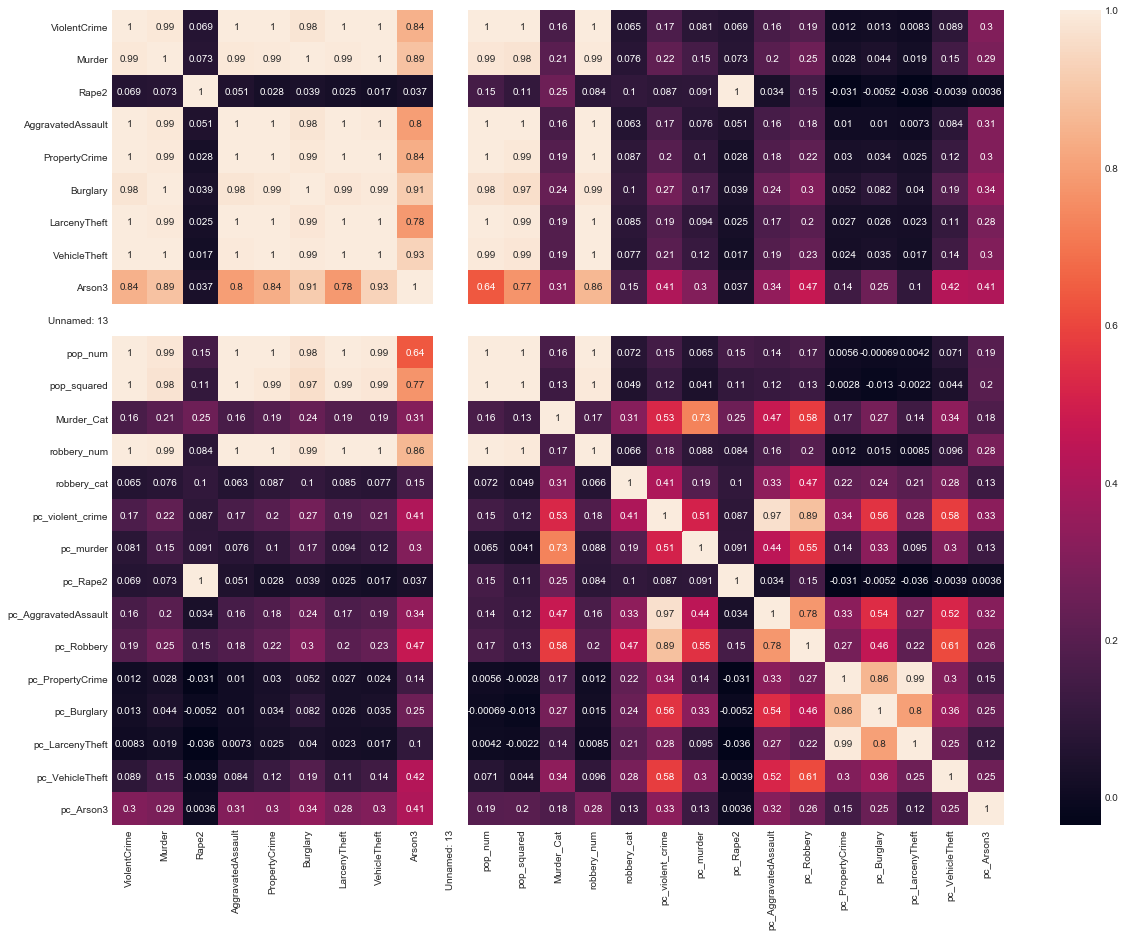

In [33]:
plt.subplots(figsize=(20,15))
sns.heatmap(per_capita_data.corr(), annot=True)
